In [112]:
#Using ANN called Long Short Term Memery
#We will use to predict 'Closing stock price'

In [113]:
#importing library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [114]:
#Get the data
df = web.DataReader('AAPL', data_source = 'yahoo', start='2011-01-01', end='2022-12-08')
#showing data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.819855
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033264
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085622
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168124
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159909
...,...,...,...,...,...,...
2022-12-02,148.000000,145.649994,145.960007,147.809998,65421400.0,147.809998
2022-12-05,150.919998,145.770004,147.770004,146.630005,68826400.0,146.630005
2022-12-06,147.300003,141.919998,147.070007,142.910004,64727200.0,142.910004


In [115]:
#get row and col
df.shape

(3006, 6)

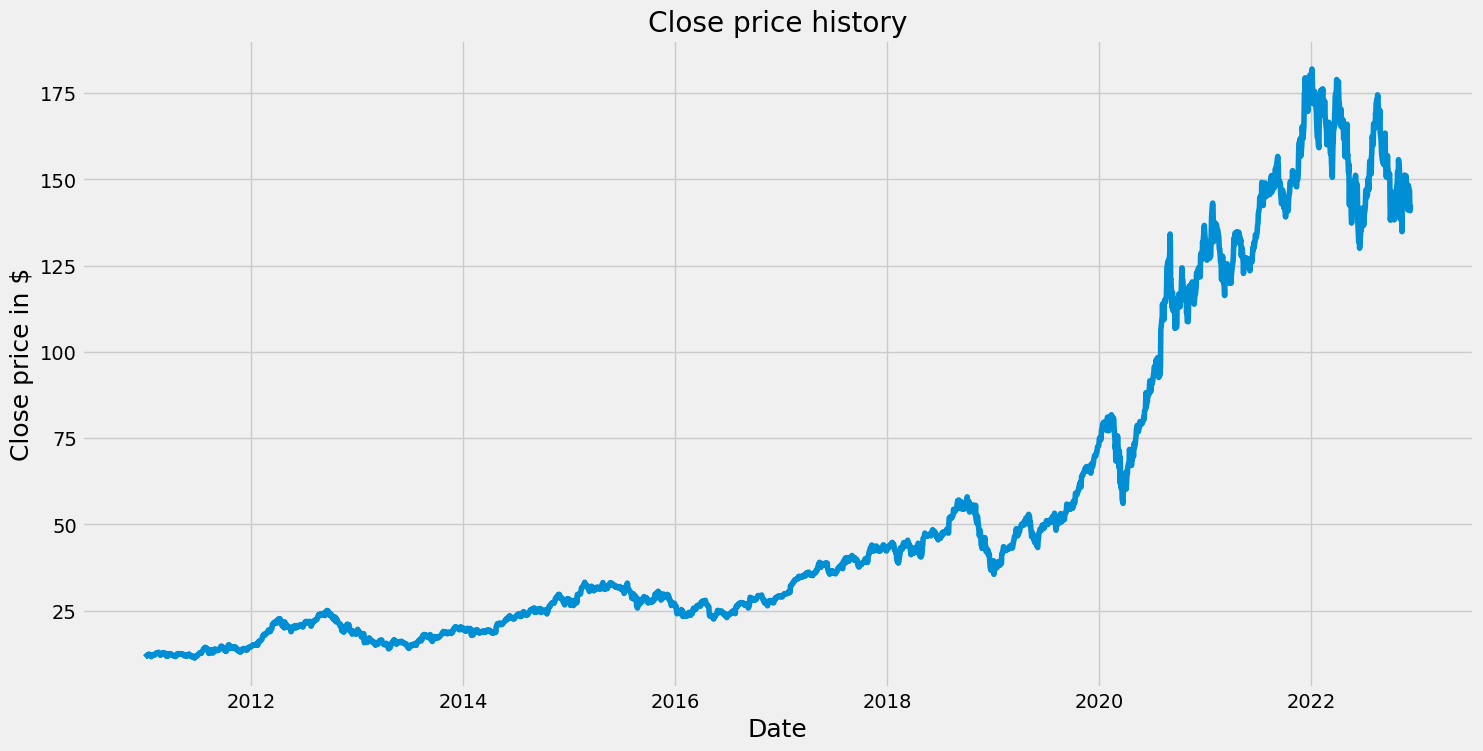

In [116]:
#ploting data focusing on closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in $',fontsize=18)
plt.show()

In [117]:
#Creating new datafram with only 'Close price column'
data = df.filter(['Close'])
#Convert the datafram to a numpy array
dataset = data.values
#Get the num of rows to train the model on
#training on 80% of data
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2405

In [118]:
#Scale the data
#Preprocesing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00151434],
       [0.00298057],
       [0.00334033],
       ...,
       [0.77100838],
       [0.75947094],
       [0.76948561]])

In [119]:
#Create the training dataset
#creating the scaler dataset

train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00151434, 0.00298057, 0.00334033, 0.00390716, 0.00385069,
       0.00435059, 0.00567459, 0.00550517, 0.00608664, 0.00635018,
       0.00693584, 0.00529809, 0.00491952, 0.00363107, 0.00238446,
       0.00462878, 0.00545497, 0.00596742, 0.00583355, 0.0043464 ,
       0.00501991, 0.00621423, 0.00606573, 0.00588166, 0.0065217 ,
       0.007647  , 0.00834142, 0.00896054, 0.00820337, 0.00868654,
       0.00917389, 0.00932448, 0.01000009, 0.00898983, 0.00737091,
       0.0048714 , 0.00571015, 0.00576453, 0.00686891, 0.00792519,
       0.00710945, 0.0076972 , 0.00925337, 0.00934541, 0.00837489,
       0.00845855, 0.0077704 , 0.00655726, 0.00767   , 0.00799839,
       0.0062979 , 0.0030726 , 0.00404103, 0.00321065, 0.00501573,
       0.00541313, 0.00499272, 0.00620168, 0.00757588, 0.0073458 ])]
[0.007454567523412045]

[array([0.00151434, 0.00298057, 0.00334033, 0.00390716, 0.00385069,
       0.00435059, 0.00567459, 0.00550517, 0.00608664, 0.00635018,
       0.00693584, 0.00529809, 0.0

In [120]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [121]:
#reshape the data
#because lsdm network expect the input to be 3-dim in the form of a number of
#a number of time step and num of features
#but now our _train dataset is a d-dim

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2345, 60, 1)

In [122]:
#buid the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [123]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [124]:
#train the mode
model.fit(x_train, y_train, batch_size=1, epochs=1)

2345/2345 [==============================] - 46s 17ms/step - loss: 3.1928e-04


In [125]:
#Creating testing dataset
#create a new array containig scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the dataset x_test ind y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])

In [126]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [127]:
#reshape the data 2d to 3d
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [128]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 12ms/step


In [129]:
#Get the Root Mean squre error(RMSE)
#rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.6271354782533765

/var/folders/kp/fb64x_lj2ysdcy62crxtzw5r0000gn/T/ipykernel_4423/478041154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


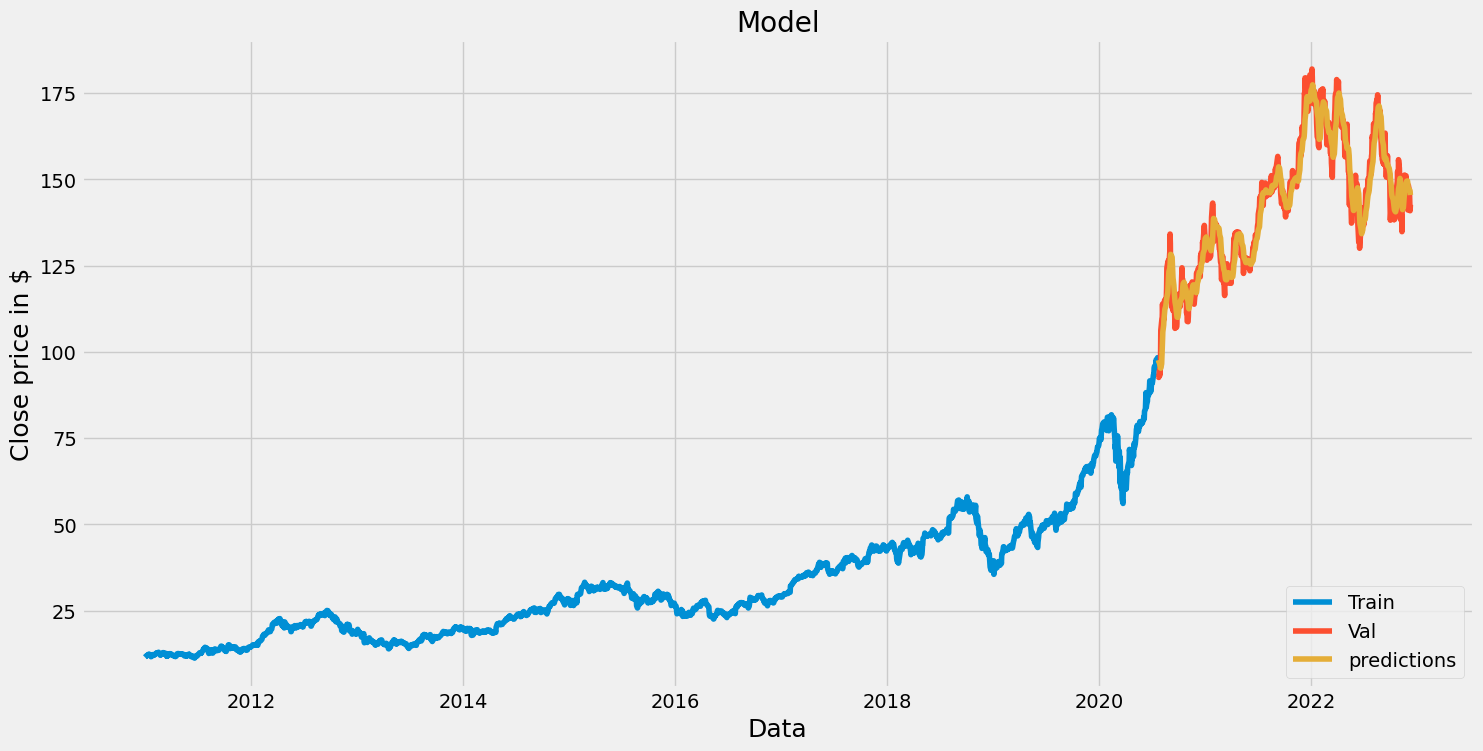

In [130]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visulation the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [131]:
#show the valid and  predicted prices
valid

,Close,predictions
Date,,
2020-07-23,92.845001,97.645752
2020-07-24,92.614998,97.262268
2020-07-27,94.809998,96.618965
2020-07-28,93.252502,96.141861
2020-07-29,95.040001,95.612869
...,...,...
2022-12-02,147.809998,147.081039
2022-12-05,146.630005,147.014862
2022-12-06,142.910004,146.906570


In [132]:
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start='2011-01-01', end='2022-12-08')

In [133]:
#Create a new Dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 daya closing price values and conver the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 26ms/step
[[144.7032]]


In [134]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-12-09', end='2022-12-09')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-12-08,143.520004,141.100006,142.360001,142.649994,62128300,142.649994
2022-12-09,145.570007,140.899994,142.339996,142.160004,76069500,142.160004
